# Statistics for Astronomers

### These are my notes from a five day workshop on statistics for astronomers, led by Dr. Andreas Berlind of Vanderbilt Univeristy

# Day 1: 2017-05-05

In [1]:
from __future__ import division # Perform float division by default

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('text', usetex=True)

## Histograms

Data Points per bin:
[  86.  328.  526.  602.  613.  625.  640.  606.  573.  473.  429.  453.
  441.  366.  347.  282.  270.  253.  189.  186.  155.  141.  146.  106.
   98.  114.   77.   80.   67.   70.   65.   61.   55.   39.   46.   42.
   35.   33.   34.   29.   42.   18.   30.   21.   16.   27.   14.   17.
   15.   17.]
Data Points per bin (sorted):
[  14.   15.   16.   17.   17.   18.   21.   27.   29.   30.   33.   34.
   35.   39.   42.   42.   46.   55.   61.   65.   67.   70.   77.   80.
   86.   98.  106.  114.  141.  146.  155.  186.  189.  253.  270.  282.
  328.  347.  366.  429.  441.  453.  473.  526.  573.  602.  606.  613.
  625.  640.]


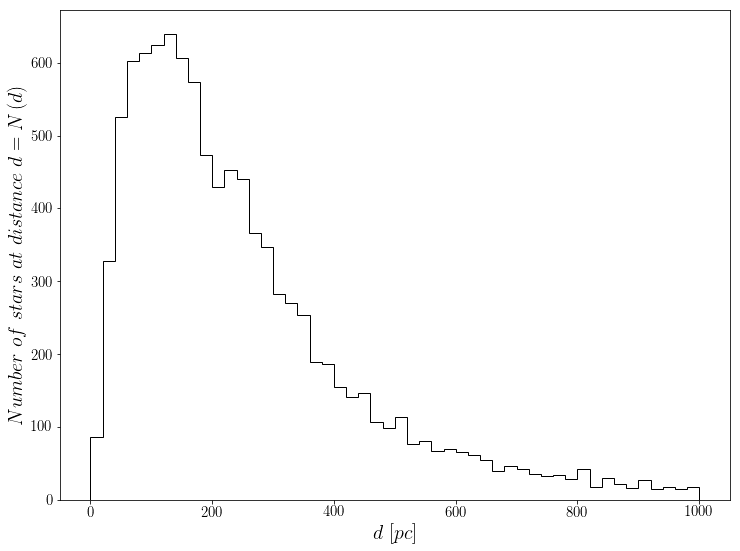

In [2]:
Data = np.loadtxt( 'hipparcos_subsample.dat' )
nDataPoints = len( Data )

xMin = 0
xMax = 1000
nBins = 50

fig = plt.figure( figsize = ( 12, 9 ) )

DataPointsPerBin, BinEdges, patches = plt.hist( Data, histtype = 'step',\
                                                bins = nBins, ec = 'black', range = ( xMin, xMax ) )

print 'Data Points per bin:'
print DataPointsPerBin

print 'Data Points per bin (sorted):'
print np.sort( DataPointsPerBin )

plt.xlabel( '$d\ [pc]$', fontsize = 20 )
plt.ylabel( r'$Number\ of\ stars\ at\ distance\ d=N\left(d\right)$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.show()

The data at small $d$ increases like $d^2$ because our bins (spherical annuli) have volumes that increase like $d^2$ ($dV=4\pi r^2dr$), so we will have more stars in bins with larger volumes. The data at large $d$ decreases because our sample is flux-limited, i.e. we can't see all of the fainter stars at large distances.

**For the rest of the notebook the horizontal axis will be labled simply as $x$ to reinforce that these techniques hold for *any* data set**

## Normalized Histogram

Probabilities are defined between 0 and 1, so for our plot to be interpreted as a probability we have to normalize it

Bins (raw):
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990.]
Bins (shifted):
[   5.   15.   25.   35.   45.   55.   65.   75.   85.   95.  105.  115.
  125.  135.  145.  155.  165.  175.  185.  195.  205.  215.  225.  235.
  245.  255.  265.  275.  285.  295.  305.  315.  325.  335.  345.  355.
  365.  375.  385.  395.  405.  415.  425.  435.  445.  455.  465.  475.
  485.  495.  505.  515.  525.  535.  545.  555.  565.  575.  585.  59

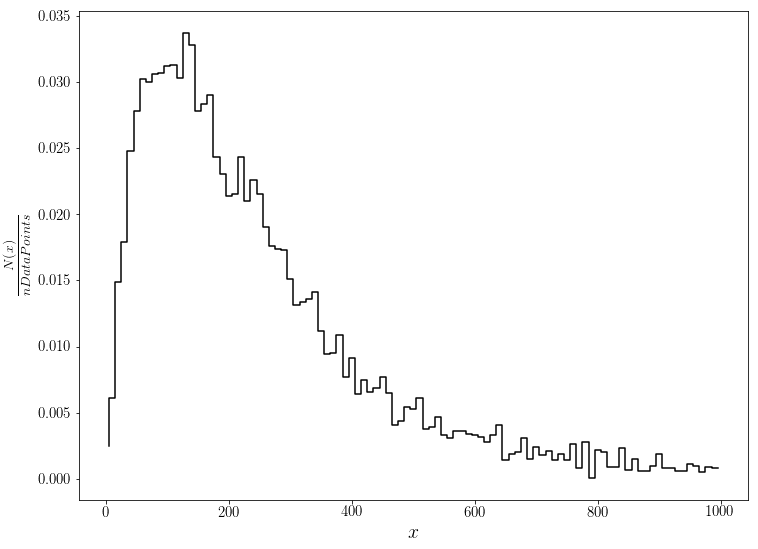

In [3]:
nBinEdges = 101

BinEdges                = np.linspace( xMin, xMax, nBinEdges )
DataPointsPerBin, edges = np.histogram( Data, bins = BinEdges )

nBins = nBinEdges - 1

BinWidth = ( xMax - xMin ) / nBins

Bins = np.copy( BinEdges[ 0 : -1 ] ) # Remove one element (the last bin edge)\
                                     # because there is always one less bin than bin edges

Bins += BinWidth / 2                 # We want our bins to be centered on their central x-values
# i.e if we have a bin that starts at 0 pc and goes to 10 pc and we want it centered at 5 pc

# Equivalently
#Bins = np.copy( BinEdges[ 1 :  ] )
#Bins -= BinWidth / 2

print 'Bins (raw):\n', BinEdges[ 0 : -1 ]
print 'Bins (shifted):\n', Bins

DataPointsPerBinNormalized = DataPointsPerBin / nDataPoints

fig = plt.figure( figsize=( 12, 9 ) )

plt.step( Bins, DataPointsPerBinNormalized, c = 'k' )

plt.xlabel( '$x$', fontsize = 20 )
plt.ylabel( r'$\frac{N\left(x\right)}{nDataPoints}$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.show()

We want to have a histogram that is independent of our binning. To do this we plot not $N/nDataPoints$, but $N/\left(nDataPoints\times\text{BinWidth}\right)$ (i.e. $N/\left(nDataPoints\times dx\right)$). This is because if BinWidth doubles, so does $N$. i.e. if the bin is twice as big it will also have twice as many stars. This is an approximation for small bin widths. Note that this changes the dimensions of the vertical axis from being dimensionless to being $\text{BinWidth}^{-1}$ (i.e. $x^{-1}$)

## "Normalized" Histogram with Different Bin Widths

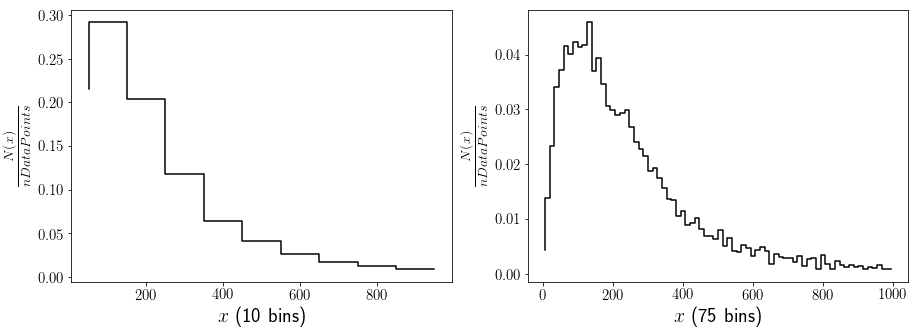

In [4]:
fig = plt.figure( figsize = ( 15, 5 ) )

def NormHist( nBinEdges, Data, xMin, xMax, PlotNumber ):
    
    BinEdges                = np.linspace( xMin, xMax, nBinEdges )
    DataPointsPerBin, edges = np.histogram( Data, bins = BinEdges )
    
    nBins = nBinEdges - 1
    BinWidth = ( xMax - xMin ) / nBins
    
    Bins = BinEdges[ 0 : -1 ] + BinWidth / 2
    DataPointsPerBinNormalized = DataPointsPerBin / len( Data )
    
    plt.subplot( 1, 2, PlotNumber )
    
    plt.step( Bins, DataPointsPerBinNormalized, c = 'k' )

    plt.xlabel( '$x$ (' + str( nBins ) + ' bins)', fontsize = 20 )
    plt.ylabel( r'$\frac{N\left(x\right)}{nDataPoints}$', fontsize = 20 )
    plt.xticks( fontsize = 15 )
    plt.yticks( fontsize = 15 )
    
    return

NormHist( nBinEdges = 11, Data = Data, xMin = xMin, xMax = xMax, PlotNumber = 1 )
NormHist( nBinEdges = 76, Data = Data, xMin = xMin, xMax = xMax, PlotNumber = 2 )

plt.show()

Note that the values on the vertical axis are different for the two distributions. This is because we didn't divide by the bin width.

## Properly (Bin Width independently) Normalized Histogram

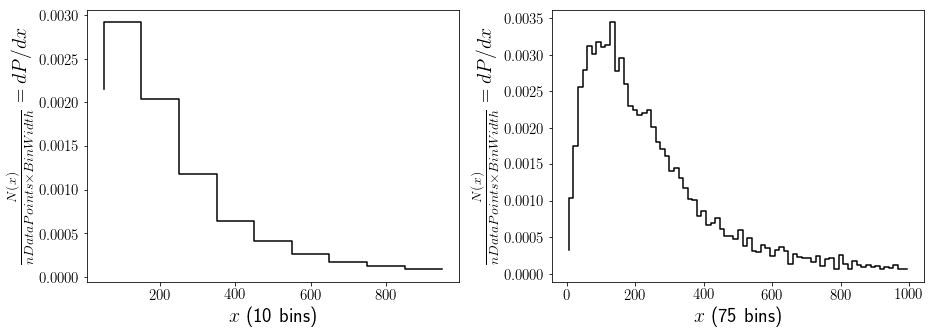

In [5]:
fig = plt.figure( figsize = ( 15, 5 ) )

def PropNormHist( nBinEdges, Data, xMin, xMax, PlotNumber ):
        
    BinEdges                = np.linspace( xMin, xMax, nBinEdges )
    DataPointsPerBin, edges = np.histogram( Data, bins = BinEdges )
    
    nBins = nBinEdges - 1
    BinWidth = ( xMax - xMin ) / nBins
    
    Bins = BinEdges[ 0 : -1 ] + BinWidth / 2
    DataPointsPerBinNormalized = DataPointsPerBin / ( BinWidth * len( Data ) )
    
    plt.subplot( 1, 2, PlotNumber )
    
    plt.step( Bins, DataPointsPerBinNormalized, c = 'k' )

    plt.xlabel( '$x$ (' + str( nBins ) + ' bins)', fontsize = 20 )
    plt.ylabel( r'$\frac{N\left(x\right)}{nDataPoints\times BinWidth}=dP/dx$', fontsize = 20 )
    plt.xticks( fontsize = 15 )
    plt.yticks( fontsize = 15 )
    
    return

PropNormHist( nBinEdges = 11, Data = Data, xMin = xMin, xMax = xMax, PlotNumber = 1 )
PropNormHist( nBinEdges = 76, Data = Data, xMin = xMin, xMax = xMax, PlotNumber = 2 )

fig.subplots_adjust( wspace = 0.25 )
plt.show()

DataPointsPerBinBinWidthNormalized = DataPointsPerBin / ( nDataPoints * BinWidth )

This is now a probability *per parsec*. i.e. it is a probability density: $\rho\left(x\right)=dP\left(x\right)/dx$. Note that despite us using two different binwidths the probability density (value on the vertial axis) is the same at each corresponding point for the two plots. We see that

$\frac{N\left(x\right)}{BinWidth}\sim\frac{dN\left(x\right)}{dx}\implies\frac{1}{nDataPoints}\frac{dN\left(x\right)}{dx}=\frac{dP\left(x\right)}{dx}\implies P\left(x\right)=\frac{1}{nDataPoints}N\left(x\right)$, as we expect.

## Cumulative Distribution Function

To get the *probability* we need to sum up the area under the probability density curves. The *cumulative distribution function* is defined as the integral of the probability density from the lowest possible value up to some arbitrary value:

$\text{CDF}\left(x\right)\equiv P\left(<x\right)=\int\limits_{x_{\text{min}}}^x\frac{dP}{dx}dx=\int\limits_{P\left(x_{\text{min}}\right)}^{P\left(x\right)}dP$

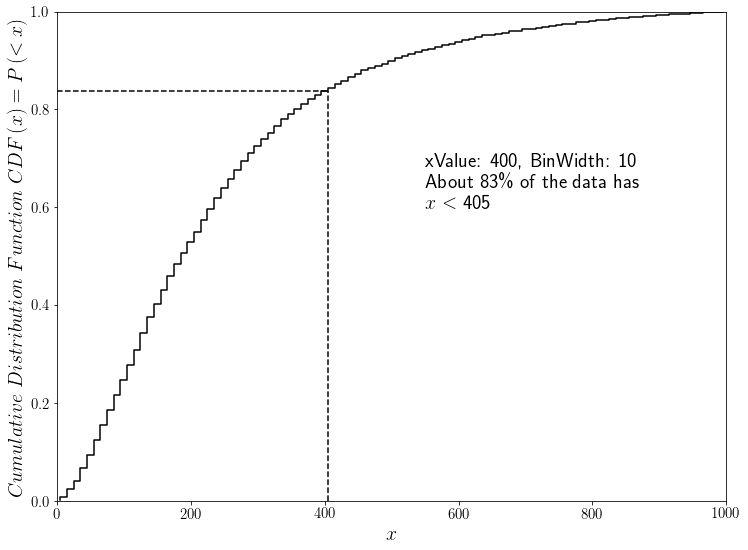

In [6]:
CumSumData = np.cumsum( DataPointsPerBinNormalized )

xValue = 400

BinNumbers = np.where( Bins >= xValue )
BinNumber  = BinNumbers[0][0]

fig = plt.figure( figsize = ( 12, 9 ) )

plt.step( Bins, CumSumData, 'k' )

plt.plot( [ xMin, Bins[ BinNumber ] ], [ CumSumData[ BinNumber ], CumSumData[ BinNumber ] ], 'k--' )
plt.plot( [ Bins[ BinNumber ], Bins[ BinNumber ] ], [ 0, CumSumData[ BinNumber ] ], 'k--' )

plt.xlim( xMin, xMax )
plt.ylim( 0, 1 )

plt.text( 550, 0.6, 'xValue: ' + str( xValue ) + ', BinWidth: ' + str( int( BinWidth ) ) +\
                    '\nAbout ' + str( int( 100 * CumSumData[ BinNumber ] ) ) +\
                    '\% of the data has\n$x<$ ' + str( int( Bins[ BinNumber ] ) ), fontsize = 20 )

plt.xlabel( '$x$', fontsize = 20 )
plt.ylabel( r'$Cumulative\ Distribution\ Function\ CDF\left(x\right)=P\left(<x\right)$', fontsize = 20)
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.show()

## Probability Distribution Moments

From a probability distribution we can calculate some characteristic quantities. One such quantity is the *mean*. The mean tells you roughly *where the data is*. We can also calculate the *variance*. The *variance* is the mean of the square of the difference between the variable and the mean and tells you roughly *how spread out the data is*.

**Mean (first moment of the distribution)**: $\mu=\left<d\right>$.

**Variance (second moment of the distribution)**: $\sigma^2=\left<\left(d-\mu\right)^2\right>$. ($\sigma$ is the standard deviation)

**Skewness (third moment)**: $S_3=\frac{1}{N\sigma^3}\sum\limits_i\left(x_i-\mu\right)^3$. -- Tells us how symmetric the distribution is

**Kurtosis (fourth moment)**: $S_4=\frac{1}{N\sigma^4}\sum\limits_i\left(x_i-\mu\right)^4-3$. -- Tells us how the distribution is curved. Pointier than Gaussian is positive Kurtosis

For a Gaussian distribution, all moments higher than 2 are zero

The *mode* of the distribution is the most common value (the peak of the distribution)

The *median* of the distribution is the middle value. i.e. the median is the point where the probability is one half. Also, it is the point in the distribution where the areas under the curves on each side of the median are equal

In [7]:
Mu = 1 / nDataPoints * np.sum( Data )
print 'Mean:              ', Mu

StdDev = np.sqrt( 1 / ( nDataPoints - 1 ) * np.sum( ( Data - Mu)**2 ) )
print 'Standard Deviation:', StdDev

Skewness = 1 / ( nDataPoints * StdDev**3 )    * np.sum( ( Data - Mu )**3 )
print 'Skewness:          ', Skewness

Kurtosis = 1 / ( nDataPoints * StdDev**4 )    * np.sum( ( Data - Mu )**4 ) - 3
print 'Kurtosis:          ', Kurtosis

Mean:               247.775356071
Standard Deviation: 188.709040028
Skewness:           1.41723317781
Kurtosis:           1.94316080512


## Percentiles (median et. al.)

#### On the cumulative distribution function, the quantities on the veritcal axis are the *percentiles*. i.e. if you are at 0.7 that is the 70th percentile. That means that 70% of the data lie between $x_{\text{min}}$ and $x$.

In [8]:
DataSorted = np.sort( Data )
print ' 50th percentile (d50) (median):', DataSorted[ int( nDataPoints * 0.5 ) ]

Percentile = [ 0.16, 0.84 ]

print '', str( int( 100 * Percentile[ 0 ] ) ) + 'th percentile (d16):         ',\
    DataSorted[ int( nDataPoints * Percentile[ 0 ] ) ]

print '', str( int( 100 * Percentile[ 1 ] ) ) + 'th percentile (d84):         ',\
    DataSorted[ int( nDataPoints * Percentile[ 1 ] ) ]

 50th percentile (d50) (median): 196.5
 16th percentile (d16):          81.77
 84th percentile (d84):          413.2


Putting the output values from the above column into 'xValue' for the CDF should give you the percentile

## Comparing Model to Data

#### Function with which we are going to compare our data set:

#### $y=\sqrt{x}e^{-\frac{x}{150}}$

#### Note that we need to normalize the above function

We do the normalization in two functions because we want to have the normalization factor completely computed when we plot the CDF.

In [9]:
p1 = 150

def yNormFinder( x, dx, p1 ):
    
    return np.sum( np.sqrt( x ) * np.exp( -x / p1 ) ) * dx

Norm = yNormFinder( x = Bins, dx = BinWidth, p1 = p1 )

def y( x, p1, Norm ):
    
    return 1 / Norm * np.sqrt( x ) * np.exp( -x / p1 )

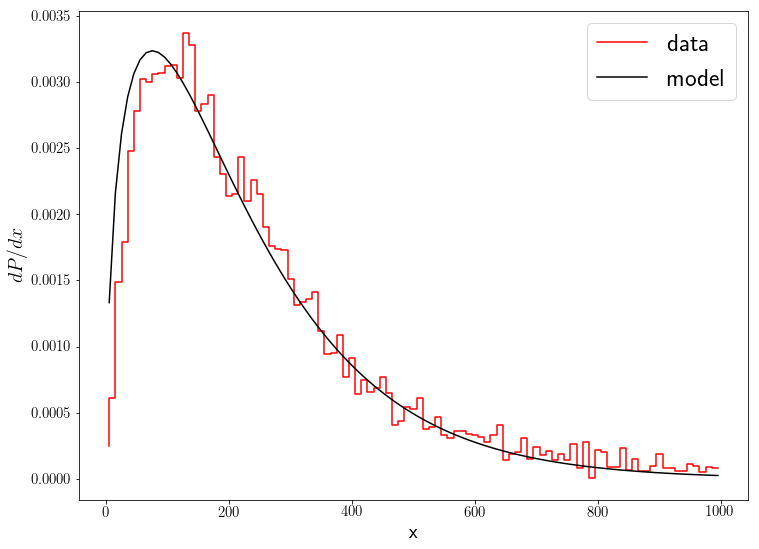

In [10]:
fig = plt.figure( figsize = ( 12, 9 ) )

plt.step( Bins, DataPointsPerBinBinWidthNormalized,  c = 'r', label = 'data' )
plt.plot( Bins, y( x = Bins, p1 = p1, Norm = Norm ), c = 'k', label = 'model' )

plt.xlabel( 'x', fontsize = 20 )
plt.ylabel( '$dP/dx$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.legend( prop = { 'size' : 25 } )
plt.show()

#### To find the mean of a distribution given only a histogram,
$\mu=\frac{1}{N}\sum\limits_i^{N_{bins}}N_i\left(x_{bin,i}\right)x_{bin,i}\implies\mu=\frac{1}{N}\int\limits_0^{\infty}N\left(x\right)xdx.$

### Moments of Data Using Model

In [11]:
dx = BinWidth

Mu = np.sum( y( x = Bins, p1 = p1, Norm = Norm ) * Bins ) * dx
print 'Mean:               ', Mu

StdDev = np.sqrt( nDataPoints / ( nDataPoints - 1 ) *\
                  np.sum( y( x = Bins, p1 = p1, Norm = Norm ) * ( Bins - Mu )**2 ) * dx )
print 'Standard Deviation: ', StdDev

i = 0
Percentile = 0.5

while ( ( np.sum( y( x = Bins[ 0 : i ], p1 = p1, Norm = Norm ) ) * dx ) < Percentile ):
    i += 1
    Median = Bins[ i ]

print 'Median:             ', Median

Mean:                221.023518597
Standard Deviation:  174.115561989
Median:              185.0


## CDF for Model

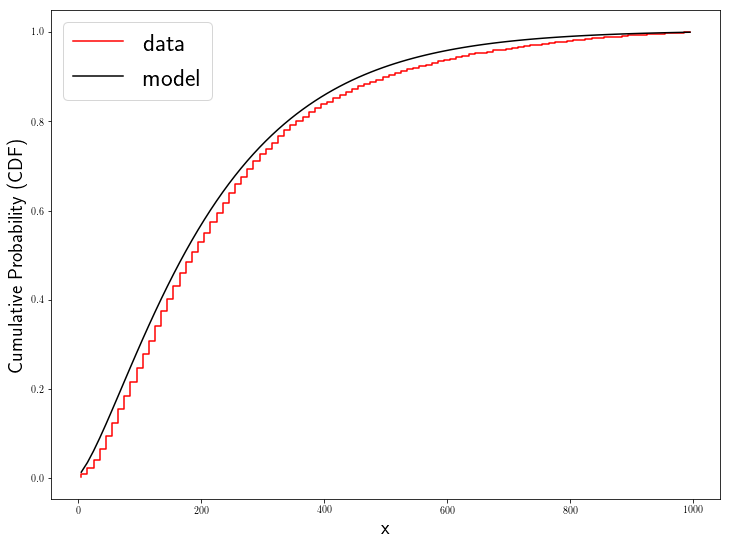

In [12]:
CumSumModel = np.cumsum( y( x = Bins, p1 = p1, Norm = Norm ) ) * dx

fig = plt.figure( figsize = ( 12,9 ) )

plt.step( Bins, CumSumData,  label = 'data',  c = 'red' )
plt.plot( Bins, CumSumModel, label = 'model', c = 'black' )

plt.xlabel( 'x', fontsize = 20 )
plt.ylabel( 'Cumulative Probability (CDF)', fontsize = 20 )
plt.legend( prop = { 'size' : 25 } )
plt.show()

# Day 2: 2017-05-08


## General Statistics

When comparing data to a model, always express it as a probability (i.e. if the probability is 10% then there is a 10% chance that the model matches reality)
    
We want to know the TRUTH. We have DATA and a MODEL. We want to see if MODEL=TRUTH. The way to think about it is:

*If* the MODEL *were* the TRUTH, what DATA *would* we observe?

## KS Test:

The Kolmogorov-Smirnoff (KS) test is good because it doesn't need errors -- it assumes that all of the errors are Poisson

**BUT: The KS statistic is only meaningful if the two distributions are different. If the KS test tells you that two distributions are the same, it is meaningless**

The basic idea is to make $N$ different data sets from our original data set. Next we make 

find the maximum difference in the CDF between MODEL and DATA and compare that to the difference between MODEL and DATA1, DATA2, DATA3, ..., DATAN.

Ex.) Assume we draw 10,000 stars (because our data has 10,000 stars) $N$ times from MODEL, from which we get DATA1, DATA2, ..., DATAN. We then compare DATA to DATA1, DATA2, ..., DATAN.

Next we make a probability density of the difference between model and data *drawn from that model*, $dP_{max}$. Then we see where our $dP_{max}$ falls on that curve, and see how much area under the curve is greater than our result.

scipy.stats.KSTest does this.

An alternative to KS is the **Anderson-Darling** test (not discussed here).

In [13]:
dPmax = np.max( np.abs( CumSumModel - CumSumData ) )
print 'max dP:', dPmax

dPargmax = np.argmax( np.abs( CumSumModel - CumSumData ) )
print 'd [pc]:', Bins[ dPargmax ]

max dP: 0.0653302721402
d [pc]: 105.0


## Errors

The question of whether or not data fits a model is *meaningless* without errors.

An error is the distribution of hypothetical values for the measured value. Given a measurement, how likely is it that the measurement accurately represents the *true* value.

Forward modeling: start with model and predict observations

Backward modeling: start with data and figure out what correct model should be (more difficult)

## Poisson Distribution

For Poisson distribution: $\sigma=\sqrt{N_{exp}}$.

## Example: Dart Throwing

Assume we have a one-dimensional wall of unit length with a target located at the left end which takes up a fractional space of $A_{frac}$.

Randomly throw $N_{darts}$, $N_{trials}$ times at the wall and plot a histogram of the number of times the darts hit the target.

How many times per trial did between 90 and 110 darts hit the target: 0.6567


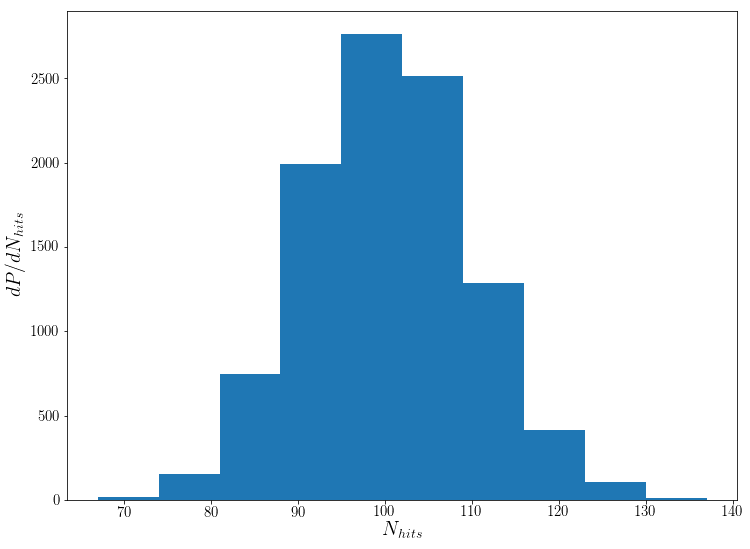

In [14]:
Ndarts  = 1000
Ntrials = 10000
Afrac   = 0.1

Nhits = np.empty( Ntrials )
for i in range( Ntrials ):
    N = np.random.uniform( 0, 1, Ndarts )
    Nhits[ i ] = np.sum( ( N < Afrac ) )

fig = plt.figure( figsize = ( 12, 9 ) )

n, bins, patches = plt.hist( Nhits, bins = 10, normed = 0 )

counts = 0
for i in range( len( bins ) ):
    if bins[ i ] > 0.09 * Ndarts and bins[ i ] < 0.11 * Ndarts:
        counts += n[ i ]
        
print 'How many times per trial did between ' + str( int( 0.09 * Ndarts ) ) + ' and ' + str( int( 0.11 * Ndarts ) ) +\
      ' darts hit the target:', counts / Ntrials

plt.xlabel( r'$N_{hits}$', fontsize = 20 )
plt.ylabel( r'$dP/dN_{hits}$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.show()

Note that since we throw 1000 darts and our target size is 0.1, we *expect* that 100 darts will hit the target each time. That is our mean value.

In [15]:
Mu     = np.mean( Nhits )
StdDev = np.std( Nhits, ddof = 1 )

print 'Mean = Nexp:                ', Mu
print 'SQRT( Mean ) = SQRT( Nexp ):', np.sqrt( Mu )
print 'Standard Deviation:         ', StdDev

Mean = Nexp:                 99.9645
SQRT( Mean ) = SQRT( Nexp ): 9.99822484244
Standard Deviation:          9.48849002183


## Back to our original data set

### Poisson Error:

### $\sigma=\frac{dP/dx}{\sqrt{N\left(x\right)}}$

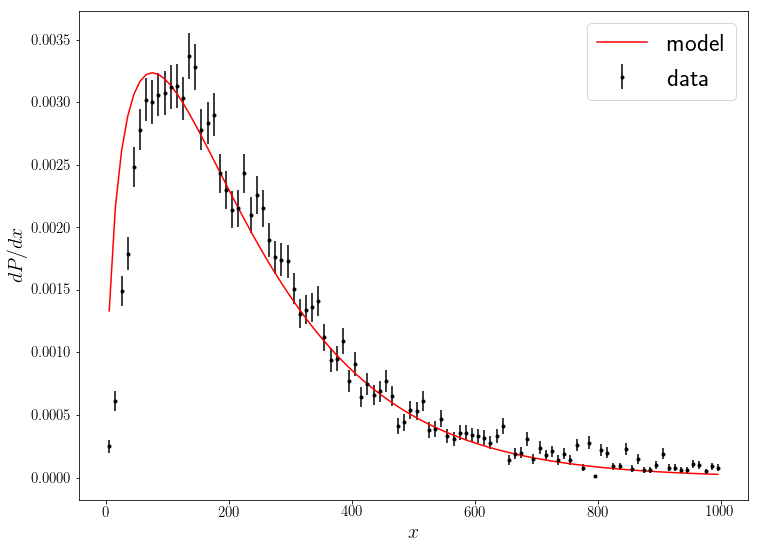

In [16]:
SigmaDataPointsPerBin = DataPointsPerBinBinWidthNormalized / np.sqrt( DataPointsPerBin )

fig = plt.figure( figsize = ( 12, 9 ) )

plt.errorbar( Bins, DataPointsPerBinBinWidthNormalized, yerr = SigmaDataPointsPerBin, fmt = 'k.', label = 'data' )
plt.plot( Bins, y( x = Bins, p1 = p1, Norm = Norm ), 'r-', label = 'model' )

plt.xlabel( '$x$', fontsize = 20 )
plt.ylabel( '$dP/dx$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.legend( prop = { 'size' : 25 } )
plt.show()

Note how the error bars get smaller as the points get lower on the vertical axis. This reflects the $1/\sqrt{N\left(x\right)}$ dependence of Poisson error.

### Think of error bars as little probability distributions (like Gaussians pointing out of the page)

If the measurements are independent (i.e. flipping a bunch of fair coins) then the total error is simply the product of the individual errors.

If the measurements are *not* independent then we need to first know how the measurements are *correlated*. More on this later.

## $\chi^2$ Test

If measurements are independent, then use $\chi^2$:

$\chi^2\equiv\sum\limits_i\left(\frac{data_i-model_i}{\sigma_i}\right)^2$

The *degrees of freedom* is the number of data points we are plotting (i.e. bins) minus the number of free parameters in the model (in this case zero).

In [17]:
ChiSq = np.sum( ( ( DataPointsPerBinBinWidthNormalized - y( x = Bins, p1 = p1, Norm = Norm ) )\
                    / SigmaDataPointsPerBin )**2 )
print 'ChiSq:', ChiSq

ChiSq: 1311.39163769


This number doesn't tell us everything, because we also want to know how likely is it that this value is accurate. This is the *p-value*.

In [18]:
from scipy import stats

pvalue = stats.chi2.cdf( ChiSq, 100 )
# stats.chi2.cdf gives probablity that model is ruled out

print 'There is about a ' + str( int( 100 * ( 1 - pvalue ) ) ) + '% chance that the data came from the model.'

There is about a 0% chance that the data came from the model.


A good rule of thumb is that $\chi^2$ ~ degrees of freedom is a 'good fit'.

# Day 3: 2017-05-09

## Fitting Data

Find a mathematical model that fits the data

In [19]:
p1Array = np.linspace( 1, 500, 500 )

def yNormFinder( x, dx, p1 ):
    
    return np.sum( np.sqrt( x ) * np.exp( -x / p1 ) ) * dx

Norm = [ yNormFinder( x = Bins, dx = BinWidth, p1 = p1Array[ i ] ) for i in range( len( p1Array ) ) ]

def y( x, Norm, p1 ):
    
    return 1 / Norm * np.sqrt( x ) * np.exp( -x / p1 )

In [20]:
def ChiSqFinder( Data, Model, Sigma ):
    return np.nansum( ( ( Data - Model ) / Sigma )**2 )

ChiSq = np.array( [ ChiSqFinder( Data = DataPointsPerBinBinWidthNormalized,\
                                 Model = y( x = Bins, Norm = Norm[ i ], p1 = p1Array[ i ] ),\
                                 Sigma = SigmaDataPointsPerBin ) for i in range( len( p1Array ) ) ] )

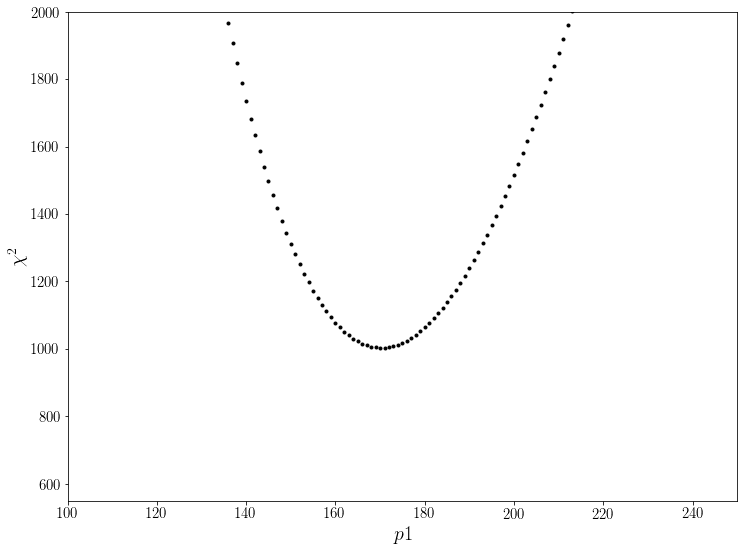

In [21]:
fig = plt.figure( figsize = ( 12, 9 ) )
plt.plot( p1Array, ChiSq, 'k.' )

plt.xlabel( r'$p1$',     fontsize = 20 )
plt.ylabel( r'$\chi^2$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.xlim( 100, 250 )
plt.ylim( 550, 2000 )

plt.show()

In [22]:
p1Best   = p1Array[ np.argmin( ChiSq ) ]
ChiSqMin = np.min( ChiSq )

print 'Best p1:      ', p1Best
print 'Minimum ChiSq:', ChiSqMin

Best p1:       170.0
Minimum ChiSq: 1003.67746768


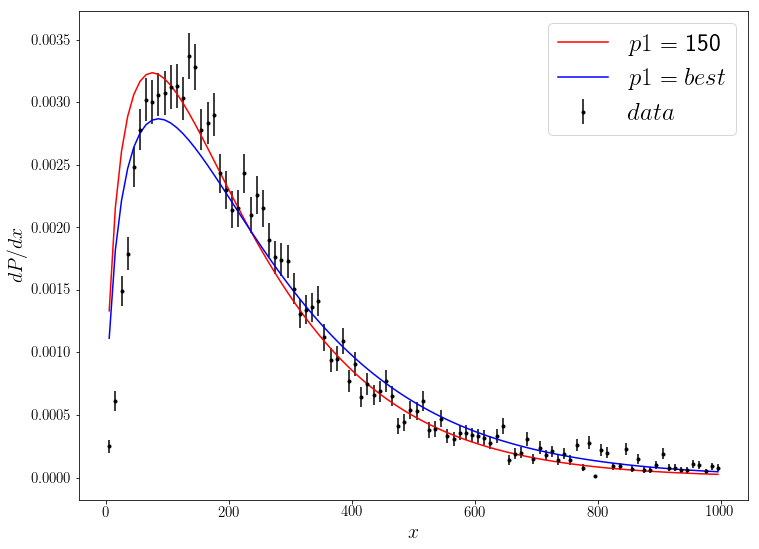

In [23]:
NormBest = Norm[ np.argmin( ChiSq ) ]

fig = plt.figure( figsize = ( 12, 9 ) )

plt.errorbar( Bins, DataPointsPerBinBinWidthNormalized, yerr = SigmaDataPointsPerBin,  fmt = 'k.', label = '$data$' )
plt.plot( Bins, y( x = Bins, Norm = Norm[ int( p1 ) - 1 ], p1 = p1Array[ 149 ] ), 'r-', \
          label = '$p1=\ $' + str( int( p1 ) ) )
plt.plot( Bins, y( x = Bins, Norm = NormBest, p1 = p1Best ), 'b-', label = '$p1=best$' )

plt.xlabel( '$x$',     fontsize = 20 )
plt.ylabel( '$dP/dx$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.legend( prop = { 'size' : 25 } )
plt.show()

Notice that around x = 800 the data jumps a little bit. This is due to either 1.) our estimate of the error is wrong, or 2.) our model is wrong.

Our model still doesn't look to good near zero. So, we will now "add more freedom" to the model by changing the square root of $x$ to $x^p$.

## $\chi^2$ with two parameters

In [24]:
Np       = 500
p1Array2 = np.linspace( 1, 250, Np )
p2Array2 = np.linspace( 0, 2,   Np )

def yNormFinder2p( x, dx, p1, p2 ):
    
    return np.sum( x**p2 * np.exp( -x / p1 ) ) * dx

Norm = np.empty( ( Np, Np ) )

for i in range( Np ):
    for j in range( Np ):
        Norm[ i, j ] = yNormFinder2p( x = Bins, dx = BinWidth, p1 = p1Array2[ i ], p2 = p2Array2[ j ] )

def y2p( x, Norm, p1, p2 ):
    
    return 1 / Norm * x**p2 * np.exp( -x / p1 )

ChiSq = np.empty( ( Np, Np ) )

for i in range( Np ):
    for j in range( Np ):
        ChiSq[ i, j ] = ChiSqFinder( Data = DataPointsPerBinBinWidthNormalized,              \
                                     Model = y2p( x = Bins, Norm = Norm[ i, j ],             \
                                                  p1 = p1Array2[ i ], p2 = p2Array2[ j ] ), \
                                     Sigma = SigmaDataPointsPerBin )

In [25]:
print 'Minimum ChiSq:', np.min( ChiSq )

p1BestArg, p2BestArg = np.unravel_index(ChiSq.argmin(), ChiSq.shape )

p1Best2 = p1Array2[ p1BestArg ]
p2Best2 = p2Array2[ p2BestArg ]

print 'Best p1:      ', p1Best2
print 'Best p2:      ', p2Best2

Minimum ChiSq: 348.501754242
Best p1:       121.75751503
Best p2:       0.953907815631


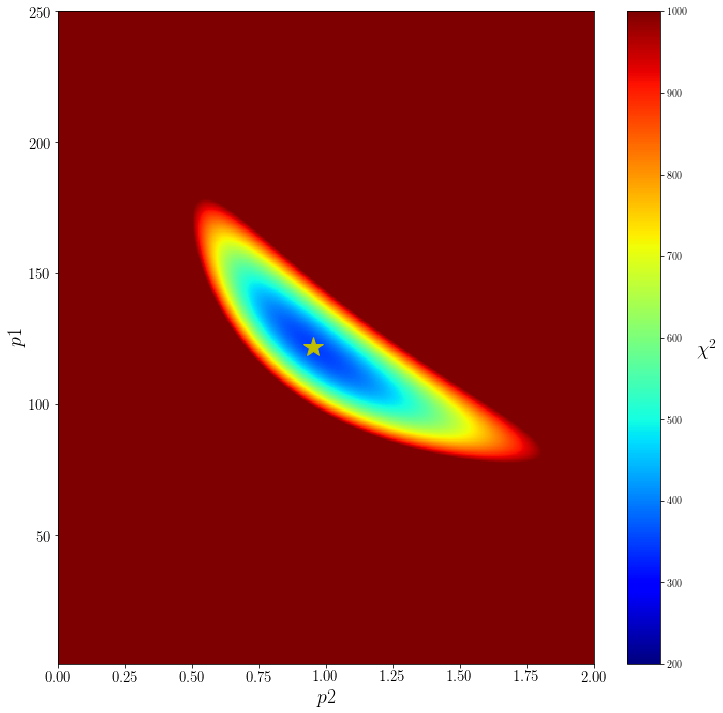

In [26]:
fig = plt.figure( figsize = ( 12, 12 ) )

plt.imshow( ChiSq, extent = ( p2Array2[ 0 ], p2Array2[ -1 ], p1Array2[ 0 ], p1Array2[ -1 ] ), aspect = 'auto',\
            vmin = 200, vmax = 1000, origin = 'lower', cmap = 'jet' )

plt.xlabel( '$p2$', fontsize = 20 )
plt.ylabel( '$p1$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

cbar = plt.colorbar()

cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel( r'$\chi^2$', rotation = 0, fontsize = 20 )

plt.plot( p2Best2, p1Best2, 'y*', markersize = 20 )
plt.show()

The shape not being a circle tells us that the two parameters are correlated.

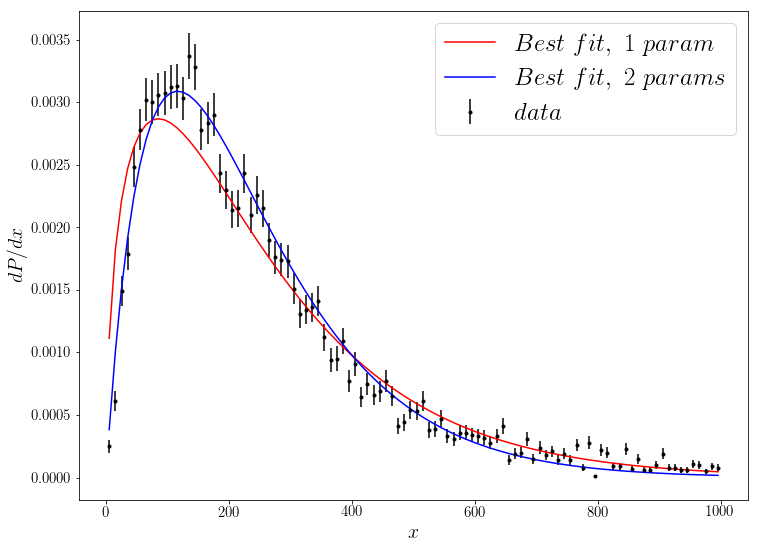

In [27]:
fig = plt.figure( figsize = ( 12, 9 ) )

plt.errorbar( Bins, DataPointsPerBinBinWidthNormalized, yerr = SigmaDataPointsPerBin,  fmt = 'k.', label = '$data$' )
plt.plot( Bins, y2p( x = Bins, Norm = NormBest, p1 = p1Best, p2 = 0.5 ), \
          'r-', label = r'$Best\ fit,\ 1\ param$')
plt.plot( Bins, y2p( x = Bins, Norm = Norm[ p1BestArg, p2BestArg ], p1 = p1Best2, p2 = p2Best2 ), \
          'b-', label = r'$Best\ fit,\ 2\ params$')

plt.xlabel( '$x$',     fontsize = 20 )
plt.ylabel( '$dP/dx$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.legend( prop = { 'size' : 25 } )
plt.show()

## Correlation/Covariance

If data is correlated, we need to compute the *covariance matrix*:

$\text{cov}\left(x,y\right)=\left<\left(x-\overline{x}\right)\left(y-\overline{y}\right)\right>$.

This can't be done if the error bars are computed with $\sqrt{N}$.

How do we get error bars?

Consider a color-redshift example (color vs. z)

We measure the colors of galaxies in different redshift bins. Now we want to get the error bars. Assume that we have each measurement 100 times (very unlikely in practice). The error bar is the standard deviation of those 100 measurements in each redshift bin.

Redshift bin 1: $\sigma_1^2=\frac{1}{N}\sum\limits_i\left(c_i-\overline{c}\right)_1^2\hspace{5em}N=100$

Redshift bin 2: $\sigma_2^2=\frac{1}{N}\sum\limits_i\left(c_i-\overline{c}\right)_2\hspace{5em}N=100$

OR

$\sigma_{12}=\frac{1}{N}\sum\limits_i\left(c_i-\overline{c}\right)_1\left(c_i-\overline{c}\right)_2$ (covariance matrix)

OR

$\frac{\sigma_{12}}{\sigma_1\sigma_2}=\frac{1}{\sigma_1\sigma_2}\frac{1}{N}\sum\limits_i\left(c_i-\overline{c}\right)_1\left(c_i-\overline{c}\right)_2$ (correlation matrix)

$\chi^2$ with covariance matrix:

$\chi^2=\sum\limits_i\sum\limits_j\left(data_i-model_i\right)C^{-1}_{ij}\left(data_j-model_j\right)$.

NOTE: $\sigma$ doesn't tell you how well you know the mean. The *error in the mean* is defined as

$\sigma_{\mu}\equiv\frac{\sigma}{\sqrt{N}}.$

$x=\mu\pm\sigma_{\mu}$.

# Day 4: 2017-05-10

## Error in the Mean

### Another darts example

Consider throwing five darts randomly at a wall. Determine the center of the board (only in the $x$-direction) based on those five measurements by calculating the mean. Perform this experiment 10000 times. Each time measure the mean, and then after performing all of the trials measure the standard deviation of the calculated means.

Note that our figure is two-dimensional. This is merely for aesthetic purposes, the formulae used are for only one dimension.

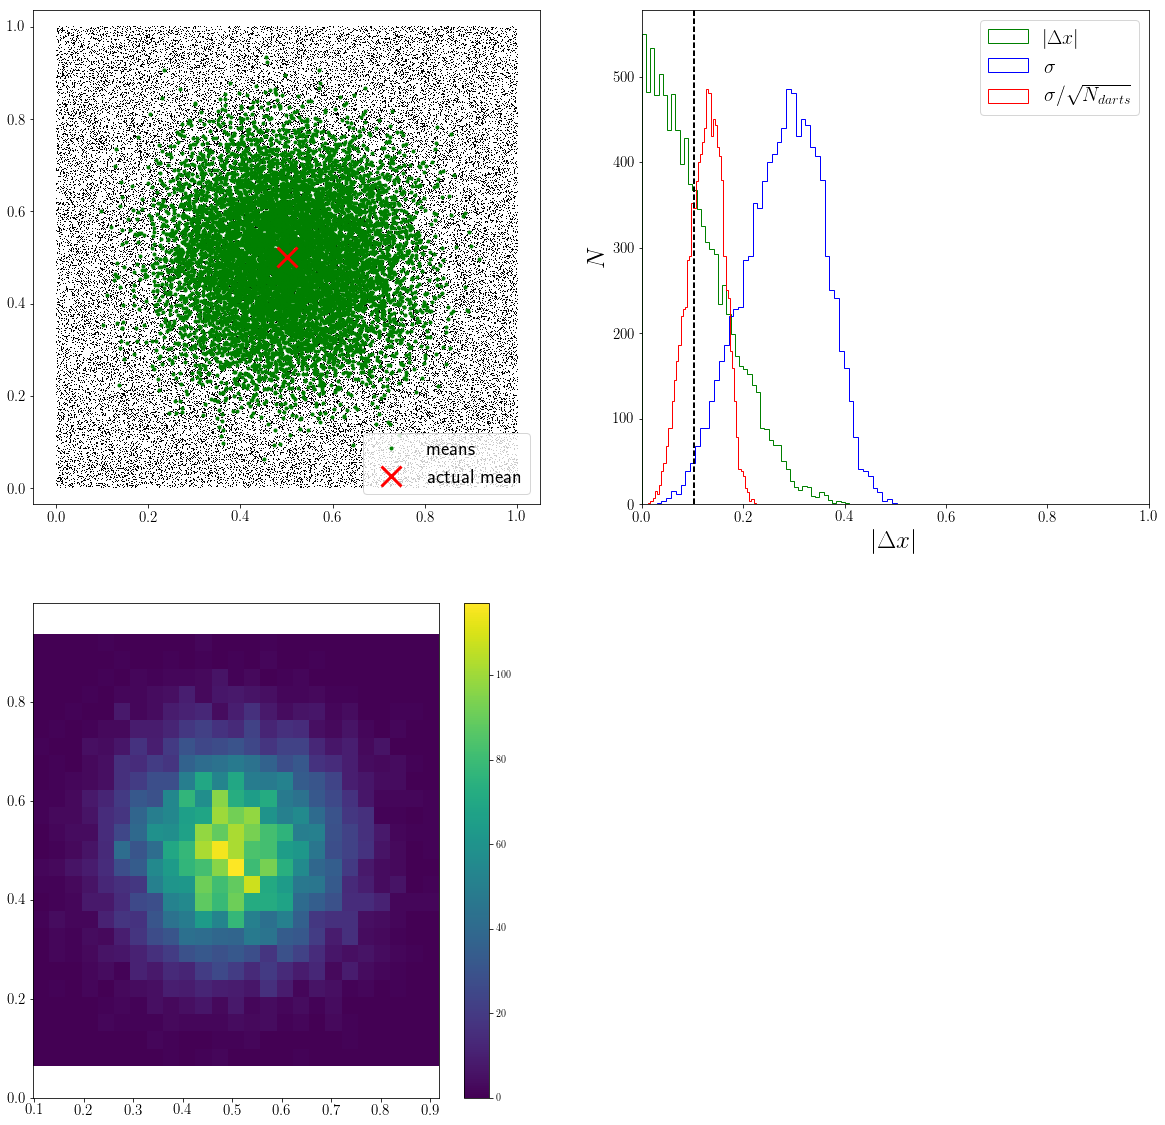

In [28]:
nDarts = 5
nTrials = 10000
BoxL = 0
BoxR = 1
nBinsDarts = 1000

xx = np.linspace( BoxL, BoxR, nBinsDarts )
yy = np.linspace( BoxL, BoxR, nBinsDarts )

MeanActual = [ np.mean( xx ), np.mean( yy ) ]

xRand = np.empty( ( nTrials, nDarts ) )
yRand = np.empty( ( nTrials, nDarts ) ) 
Means = np.empty( ( nTrials, 2 ) )
SigmaPerTrial = np.empty( nTrials )

for i in range( nTrials ):
    
    xRand[ i, :] = np.random.uniform( 0, 1, nDarts )
    yRand[ i, :] = np.random.uniform( 0, 1, nDarts )
    
    SigmaPerTrial[ i ] = np.std( xRand[ i, : ], ddof = 1 )
    
    Means[ i, 0 ] = np.mean( xRand[ i, : ] )
    Means[ i, 1 ] = np.mean( yRand[ i, : ] )

Error = np.abs( Means[ :, 0 ] - MeanActual[ 0 ] )
MeanAbsError = np.mean( Error )

fig = plt.figure( figsize = ( 20, 20 ) )

plt.subplot( 2, 2, 1 )

plt.plot( xRand, yRand, 'k,')
plt.plot( Means[ :, 0 ], Means[ :, 1], 'g.', label = 'means' )
plt.plot( MeanActual[ 0 ], MeanActual[ 1 ], 'rx', label = 'actual mean', mew = 3, ms = 20 )

plt.legend( prop = { 'size' : 20 } )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )
plt.xlim( BoxL, BoxR )
plt.ylim( BoxL, BoxR )

plt.axis('equal')

plt.subplot( 2, 2, 2 )

nError, bins, patches = plt.hist( Error, bins = 50, histtype = 'step', color = 'g',\
                                  label = r'$\left|\Delta x\right|$' )
nSigma, bins, patches = plt.hist( SigmaPerTrial, bins = 50, color = 'b', histtype = 'step',\
                                  label = r'$\sigma$' )
nSigmaNormed, bins, patches = plt.hist( SigmaPerTrial / np.sqrt( nDarts ), color = 'r', bins = 50, \
                                        histtype = 'step', label = r'$\sigma/\sqrt{N_{darts}}$' )
plt.axvline( MeanAbsError, lw=2, c = 'k', ls = '--' )

plt.xlabel( r'$\left|\Delta x\right|$', fontsize = 25 )
plt.ylabel( '$N$', fontsize = 25 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )
plt.legend( prop = { 'size' : 20 }, loc = 'best' )
plt.xlim( BoxL, BoxR )

plt.subplot( 2, 2, 3 )
plt.hist2d( Means[ :, 0 ], Means[ :, 1 ], bins = 25 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )
plt.axis('equal')
plt.colorbar()

plt.show()

Note that the standard deviation (blue histogram) doesn't change much by performing more or less trials. It does change however with differing numbers of darts.

# Bootstrap

Subsample the data many times (the same datum can appear multiple times in a subsample), measure the quantity of interest for each realization of the data, and see how it varies from sample to sample. This is how we get error bars with only one measurement. This can be done for *any* sample.

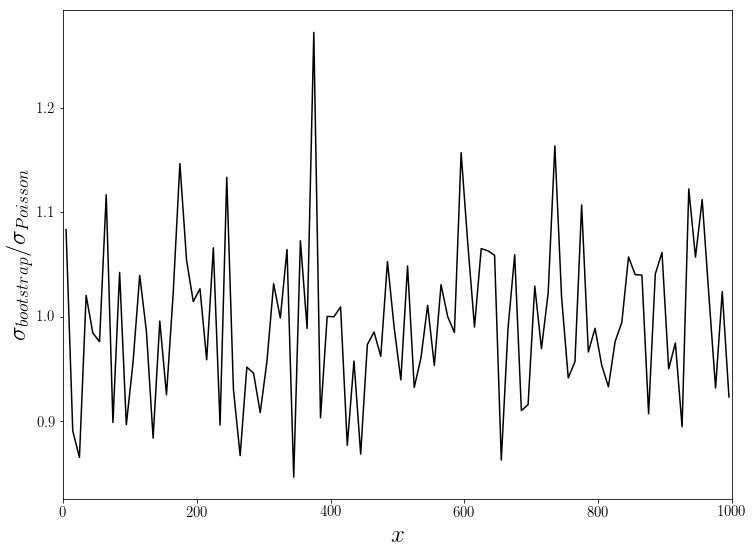

In [29]:
nBootstrap  = 100

def Bootstrap( Data, nTot, BinEdges ):
    
    temp  = np.random.choice( Data, size = nTot )

    DataPointsPerBin, edges = np.histogram( temp, bins = BinEdges, normed = 1 )
    
    return DataPointsPerBin

# Each row of this array is a realization of the data
SubSamples = np.empty( ( nBootstrap, nBins ) )

# Populate the SubSamples array
for i in range( nBootstrap ):
    SubSamples[ i, : ] = Bootstrap( Data = Data, nTot = nDataPoints, BinEdges = BinEdges )

# Compute the standard deviation of all of the subsamples per distance bin
SubSampleSigma = np.empty( ( nBins ) )

SubSampleSigma = np.std( SubSamples, axis = 0 )

fig = plt.figure( figsize = ( 12, 9 ) )

plt.plot( Bins, SubSampleSigma / SigmaDataPointsPerBin, 'k-')

plt.xlabel( r'$x$', fontsize = 25 )
plt.ylabel( '$\sigma_{bootstrap}/\sigma_{Poisson}$', fontsize = 25 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.xlim( xMin, xMax )

plt.show()

## Making our own Dataset

We start with a known probability distribution, and calculate the cumulative (CDF) by integrating $dP/dx$ over the domain of $x$.

In [30]:
# Model
def y2( x, dx, p1, p2 ):
    
    Norm = np.sum( x**p2 * np.exp( -x / p1 ) ) * dx

    return 1 / Norm * x**p2 * np.exp( -x / p1 )

In [31]:
# We need the bins for the CDF to be much finer so that we get a realistic representation of our data
nBinEdgesCumSum = 10001
binEdgesCumSum = np.linspace( xMin, xMax, nBinEdgesCumSum )

nBinsCumSum    = nBinEdgesCumSum - 1
BinWidthCumSum = ( xMax - xMin ) / nBinsCumSum
BinsCumSum     = binEdgesCumSum[ 0 : -1 ] + 0.5 * BinWidthCumSum

nSamples = 10000

CumSum = np.cumsum( y2( x = BinsCumSum, dx = BinWidthCumSum, p1 = p1Best2, p2 = p2Best2 ) ) * BinWidthCumSum

RandNums = np.random.uniform( 0, 1, nSamples )

x = BinsCumSum[ np.searchsorted( CumSum, RandNums ) ]

FakeDataPointsPerBin, edges             = np.histogram( x, bins = BinEdges )
FakeDataPointsPerBinBinWidthNormalized  = FakeDataPointsPerBin / ( nSamples * BinWidth )

SigmaFakeDataPointsPerBin = FakeDataPointsPerBinBinWidthNormalized / np.sqrt( FakeDataPointsPerBin )

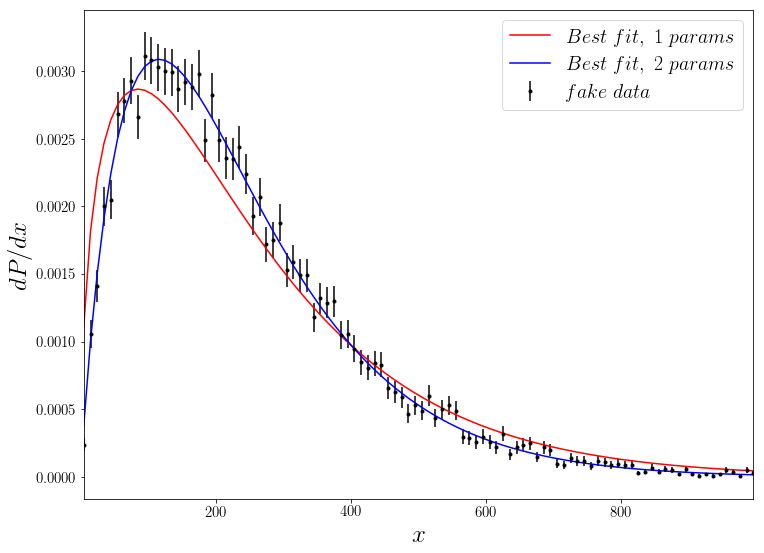

In [32]:
fig = plt.figure( figsize = ( 12, 9 ) )

plt.errorbar( Bins, FakeDataPointsPerBinBinWidthNormalized,\
              yerr = SigmaFakeDataPointsPerBin, fmt = 'k.', label = '$fake\ data$' )
plt.xlim( Bins[ 0 ], Bins[ -1 ] )

plt.xlabel( '$x$', fontsize = 25 )
plt.ylabel( '$dP/dx$', fontsize = 25 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.plot( Bins, y2( x = Bins, dx = BinWidth, p1 = p1Best, p2 = 0.5 ),      \
          'r-', label = r'$Best\ fit,\ 1\ params$' )
plt.plot( Bins, y2( x = Bins, dx = BinWidth, p1 = p1Best2, p2 = p2Best2 ), \
          'b-', label = r'$Best\ fit,\ 2\ params$' )
plt.legend( prop = { 'size' : 20 } )

plt.show()

In [33]:
# For the ChiSq we just use the same 'p1' and 'p2' arrays that we used for the real data

ChiSqFake = np.empty( ( Np, Np ) )

for i in range( Np ):
    for j in range( Np ):
        ChiSqFake[ i, j ] = ChiSqFinder( Data = FakeDataPointsPerBinBinWidthNormalized,\
                                     Model = y2( x = Bins, dx = BinWidth, p1 = p1Array2[ i ], p2 = p2Array2[ j ] ),\
                                     Sigma = SigmaFakeDataPointsPerBin )

ChiSqMinFake = np.min( ChiSqFake )

p1BestArg2Fake, p2BestArg2Fake = np.unravel_index(ChiSqFake.argmin(), ChiSqFake.shape )

p1Best2Fake = p1Array2[ p1BestArg2Fake ]
p2Best2Fake = p2Array2[ p2BestArg2Fake ]

print 'Minimum ChiSq:', ChiSqMinFake
print 'Best p1:      ', p1Best2Fake
print 'Best p2:      ', p2Best2Fake

Minimum ChiSq: 90.5453378813
Best p1:       119.761523046
Best p2:       0.98997995992


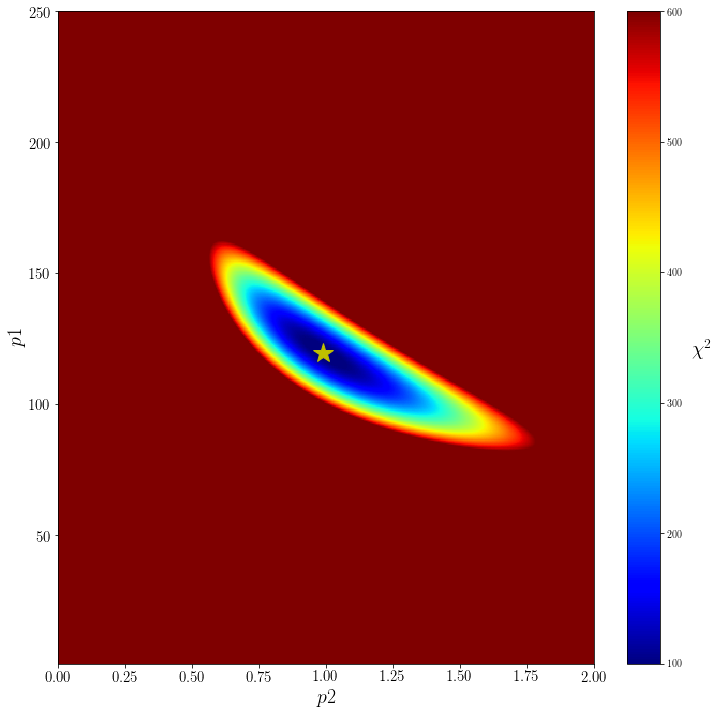

In [34]:
fig = plt.figure( figsize = ( 12, 12 ) )

plt.imshow( ChiSqFake, extent = ( p2Array2[ 0 ], p2Array2[ -1 ], p1Array2[ 0 ], p1Array2[ -1 ] ), aspect = 'auto',
            origin = 'lower', cmap = 'jet', vmin = 100, vmax = 600)

plt.xlabel( '$p2$', fontsize = 20 )
plt.ylabel( '$p1$', fontsize = 20 )
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

cbar = plt.colorbar()

cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel( r'$\chi^2$', rotation = 0, fontsize = 20 )

plt.plot( p2Best2Fake, p1Best2Fake, 'y*', markersize = 20 )
plt.show()

# Day 5: 2017-05-10

## MCMC

If you just want to find the minimum (and not the error bars) we can use "steepest descent" methods.

### Metropolis-Hastings Algorithm

1.) Make an initial guess for the parameters and calculate the $\chi^2$ given those values for the parameters

2.) Take a step in parameter space by incrementing the parameters by a small amount\* and calculate the $\chi^2$ given those new parameter values

\* To choose the step size draw a random number from a Gaussian distribution with a mean of zero and a standard deviation that will depend on the expected range of values for the parameter

3.) Decide whether or not to keep that point:

If $\chi^2_{new}<\chi^2_{old}$ then store the new values of the parameters in the chain.

If $\chi^2_{new}>=\chi^2_{old}$ then:

Pick a random number $r$ between zero and one. Then if $r=\frac{P_{new}}{P_{old}}<e^{-\frac{\chi^2_{new}-\chi^2_{old}}{2}}$ then store the new values of the parameters in the array.

If $r>e^{-\frac{\chi^2_{new}-\chi^2_{old}}{2}}$\* then store the old values of the parameters in the array

\* The probability that a model is "good" is proportional to $exp(-\chi^2/2)$ IF THE ERRORS ARE GAUSSIAN!!

Without the 'else' we wouldn't explore the space. It would just find us the minimum and not the error bars

### For our specific case:

1.) Start at p[0], dScale[0], get $\chi^2$ for that point

2.) Take a step:

p_try = p[0] + p_step

dScale_try = dScale[0] + dScale_step

Get $\chi^2_{try}$. Decide whether or not to keep that new point.

3.) If $\chi^2_{try}<\chi^2$[0], then d[1] = d_try, p[1] = p_try, $\chi^2$[1]$=\chi^2_{try}$

else 

Pick random number $r$ between 0 and 1.

For a model with $\chi^2$, the probability $P$ that the model is 'good' is proportionao to $exp(-\chi^2/2)$ IF THE ERRORS ARE GAUSSIAN!!

So, if $r=\frac{P_{new}}{P_{old}}<exp\left(\frac{\chi_{old}^2-\chi_{new}^2}{2}\right)$ (likelihood ratio),

then go to that point

else

d[1] = d[0], p[1] = p[0]

If new vhiw^2 is better then always go. If it's worse, it depends how much worse


Without the 'else' we wouldn't explore the space. It would just find us the minimum and not the error bars


p step size, pick a random number from a Gaussian distribution with mean (loc) of zero and sigma (scale) of 0.1
d step size, pick a random number from a Gaussian distribution with mean (loc) of zero and sigma (scale) of 10

In [35]:
def MCMC( Data, Bins, BinWidth, Model, Sigma, p10, p20, nSamples ):
    
    p1Chain    = np.empty( ( nSamples ) )
    p2Chain    = np.empty( ( nSamples ) )
    ChiSqChain = np.empty( ( nSamples ) )

    p1Chain[ 0 ] = p10
    p2Chain[ 0 ] = p20

    ChiSqChain[ 0 ] = ChiSqFinder( Data  = Data,\
                                   Model = Model( x = Bins, dx = BinWidth, p1 = p10, p2 = p20 ),\
                                   Sigma = Sigma )

    # Loop through the chain
    for i in range( 1, nSamples ):
    
        j = i - 1
    
        p1Old    = p1Chain[ j ]
        p2Old    = p2Chain[ j ]
        ChiSqOld = ChiSqChain[ j ]
    
        p1Step = np.random.normal( 0, 10  )
        p2Step = np.random.normal( 0, 0.1 )
    
        p1New = p1Old + p1Step
        p2New = p2Old + p2Step
        
        ChiSqNew  = ChiSqFinder( Data  = Data,\
                                 Model = Model( x = Bins, dx = BinWidth, p1 = p1New, p2 = p2New ),\
                                 Sigma = Sigma )
    
        if ChiSqNew < ChiSqOld:
        
            p1Chain[ i ]    = p1New
            p2Chain[ i ]    = p2New
            ChiSqChain[ i ] = ChiSqNew
        
        else:
            
            r = np.random.random()

            if r < np.exp( ( ChiSqOld - ChiSqNew ) / 2 ):
        
                p1Chain[ i ]    = p1New
                p2Chain[ i ]    = p2New
                ChiSqChain[ i ] = ChiSqNew
 
            else:
        
                p1Chain[ i ]    = p1Old
                p2Chain[ i ]    = p2Old
                ChiSqChain[ i ] = ChiSqOld
            
    return np.argmin( ChiSqChain ), p1Chain, p2Chain, ChiSqChain

In [36]:
p10      = 150
p20      = 0.5
nSamples = int( 1e5 )
nIter    = 5

print 'Initial guesses: p1:', p10, 'p2:', p20, '\n'

for i in range( nIter ):
    
    MinChiSqArg, p1, p2, ChiSq = MCMC( Data = FakeDataPointsPerBinBinWidthNormalized, Bins = Bins, \
                                       BinWidth = BinWidth, Model = y2, Sigma = SigmaFakeDataPointsPerBin,\
                                       p10 = p10, p20 = p20, nSamples = nSamples )

    p10 = p1[ MinChiSqArg ]
    p20 = p2[ MinChiSqArg ]

    print 'iteration', i + 1, 'p1:', p10, 'p2:', p20, 'ChiSq:', ChiSq[ MinChiSqArg ]

Initial guesses: p1: 150 p2: 0.5 

iteration 1 p1: 119.595182862 p2: 0.992755372371 ChiSq: 90.5400490419
iteration 2 p1: 119.689296176 p2: 0.991850330112 ChiSq: 90.538830396
iteration 3 p1: 119.689296176 p2: 0.991850330112 ChiSq: 90.538830396
iteration 4 p1: 119.689296176 p2: 0.991850330112 ChiSq: 90.538830396
iteration 5 p1: 119.689296176 p2: 0.991850330112 ChiSq: 90.538830396


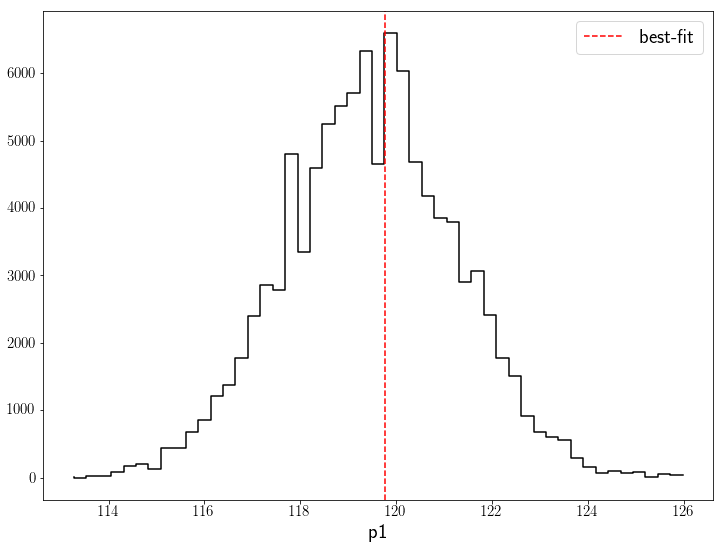

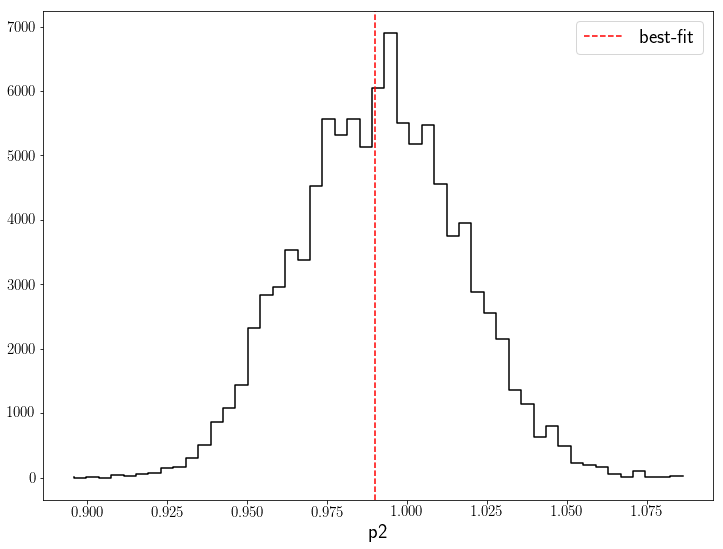

In [37]:
def Plotter( Data, nBins, xlabel ):
    
    BinEdges = np.linspace( np.min( Data ), np.max( Data ), nBins + 1 )
    
    DataPointsPerBin, edges = np.histogram( Data, bins = BinEdges )
    
    BinWidth = ( np.max( Data ) - np.min( Data ) ) / nBins 
    
    Bins = BinEdges[ 0 : -1 ] + 0.5 * BinWidth
    
    fig = plt.figure( figsize = ( 12, 9 ) )
    
    plt.step( Bins, DataPointsPerBin, c = 'k' )
    
    plt.xlabel( xlabel, fontsize = 20)
    
    if   xlabel == 'p1': plt.axvline( p1Best2Fake, ls = '--', c = 'r', label = 'best-fit' )
        
    elif xlabel == 'p2': plt.axvline( p2Best2Fake, ls = '--', c = 'r', label = 'best-fit' )
        
    else: print ''
        
    plt.xticks( fontsize = 15 )
    plt.yticks( fontsize = 15 )
    
    plt.legend( prop = { 'size' : 20 } )
    
    plt.show()
    
    return

Plotter( Data = p1, nBins = 50, xlabel = 'p1' )
Plotter( Data = p2, nBins = 50, xlabel = 'p2' )

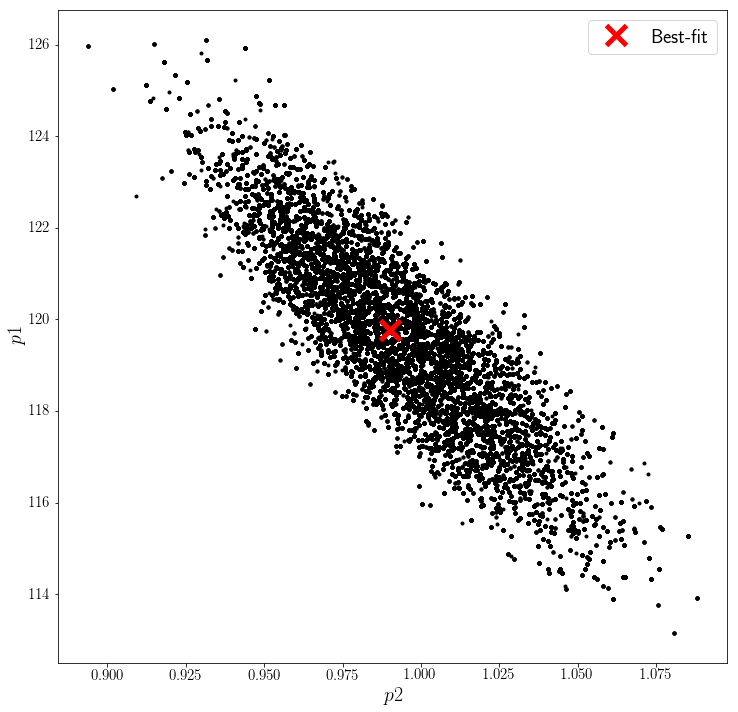

In [38]:
fig = plt.figure( figsize = ( 12, 12 ) )

plt.plot( p2, p1, 'k.' )

plt.xlabel( '$p2$', fontsize = 20 )
plt.ylabel( '$p1$', fontsize = 20 )

plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

plt.plot( p2Best2Fake, p1Best2Fake, 'rx', markersize = 20, mew = 5, label = 'Best-fit' )

plt.legend( prop = { 'size' : 20 } )

plt.show()

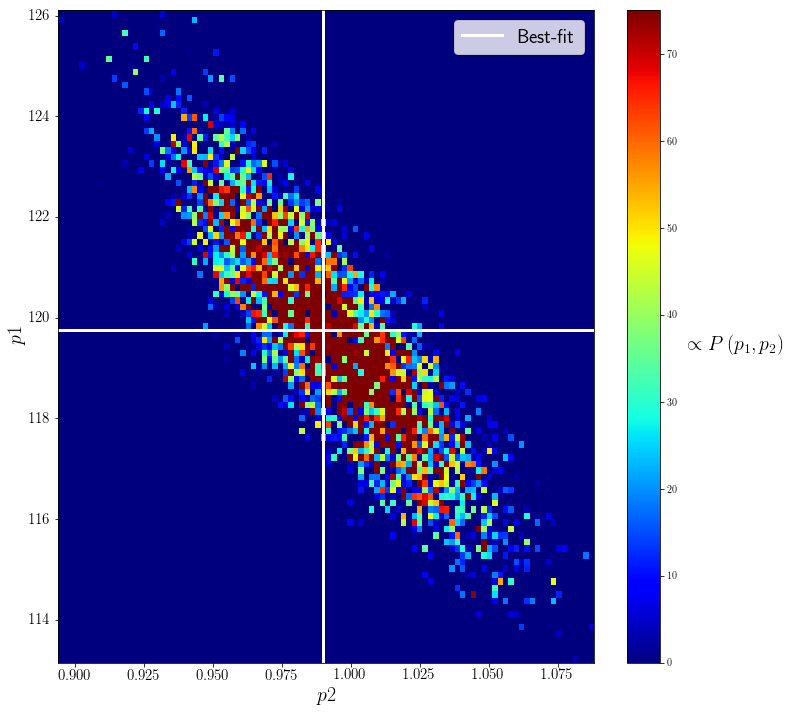

In [39]:
fig = plt.figure( figsize = ( 12, 12 ) )

plt.hist2d( p2, p1, bins = 100, vmin = 0, vmax = 75, cmap = 'jet' )

plt.xlabel( '$p2$', fontsize = 20 )
plt.ylabel( '$p1$', fontsize = 20 )

plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )

cbar = plt.colorbar()

cbar.ax.get_yaxis().labelpad = 60
cbar.ax.set_ylabel( r'$\propto P\left(p_1,p_2\right)$', rotation = 0, fontsize = 20 )

plt.plot( p2Array2, np.ones( ( Np ) ) * p1Best2Fake, 'w-', lw = 3 )
plt.plot( np.ones( ( Np ) ) * p2Best2Fake, p1Array2, 'w-', lw = 3, label = 'Best-fit' )
plt.legend( prop = { 'size' : 20 } )

plt.show()

In [40]:
from scipy import stats

pvalue = stats.chi2.cdf( ChiSq[ MinChiSqArg ], len( Bins ) - 3 )
# stats.chi2.cdf gives probablity that model is ruled out ( 1 means no way the data came from the model )

print '~', round( 100 * ( 1 - pvalue ), 0 ), '% chance that the data was drawn from the model'
print 'We expect this to be relatively high because the data WAS drawn from the model :P'

~ 67.0 % chance that the data was drawn from the model
We expect this to be relatively high because the data WAS drawn from the model :P


## Bayesian Statistics

### Conditional probability: $P\left(D|M\right)$

This says that if M is the truth, what is the probability that D came from M. This is information we have.

What we want to know is the opposite,

$P\left(M|D\right)$.

These are related by Bayes' theorem:

$P\left(M|D\right)=\frac{P\left(D|M\right)P\left(M\right)}{P\left(D\right)}$

Frequentist: just evaluate $\chi^2$ and see if it's a good model

Bayesian: says that frequentist is wrong because you can't know if you have the best model because you don't know all of the models. Or, if you only have one model it could have a bad $\chi^2$ but it is still the "best" model.

### Wikipedia example: Drug Test

Assume that there is a 99% chance that if you're a drug user that the test will be positive:

$P\left(+|u\right)=0.99$,

and also that there is a 99% chance that if you're *not* a drug user that the test will be *negative*:

$P\left(-|n\right)=0.99$.

The notation is that $u$ corresponds to a user and $n$ corresponds to not a user.

We want to know the probability that given a positive test result the person being tested is a drug user:

$P\left(u|+\right)$.

This is not the same as the first line because we can have false positives:

$P\left(u|+\right)\neq P\left(+|u\right)$.


Applying Bayes' theorem we get

$P\left(u|+\right)=\frac{P\left(+|u\right)P\left(u\right)}{P\left(+\right)}$.

$P\left(u\right)$ is fraction of all people (in the universe) that are drug users (this example assumes 0.005; this implies that the fraction of all people that are *not* drug users is $P\left(n\right)=1-P\left(u\right)=0.995$).

$P\left(+\right)$ is the probability that a drug test comes back positive. There are two ways to test positive: either you are a user and you got a positive or you are not a user and you got a false positive:

$P\left(+\right)=P\left(+|u\right)P\left(u\right)+P\left(+|n\right)P\left(n\right)$.

So, Bayes' theorem gives

### $P\left(u|+\right)=\frac{P\left(+|u\right)P\left(u\right)}{P\left(+|u\right)P\left(u\right)+P\left(+|n\right)P\left(n\right)}=\frac{\left(0.99\right)\left(0.005\right)}{\left(0.99\right)\left(0.005\right)+\left(0.01\right)\left(0.995\right)}=\frac{1}{1+\frac{\left(0.01\right)\left(0.995\right)}{\left(0.99\right)\left(0.005\right)}}\approx33\%$. ###

Considering the accuracy of the test this seems like a small probability. This apparent discrepency is due to the fact that although there is a small chance to get a false positive, there is a relatively *huge* number of non-drug users.
